In [1]:
# The full neural network code!
###############################
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import tensorflow as tf

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

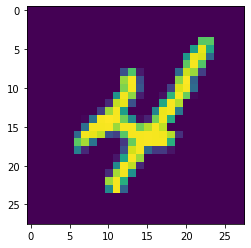

4


In [3]:
index = 9
plt.imshow (x_train[index]) 
plt.show ()
print (y_train[index])

In [4]:
# Normalize the images.
x_train = x_train / 255
x_test = x_test / 255

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
# Flatten the images.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

In [7]:
# Build the model.
model = Sequential([
  Dense(1024, activation='relu', input_shape=(784,)),
  Dense(512, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [8]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [9]:
epochs = 7
batch_size = 20

In [10]:
# Train the model.
model.fit(
  x_train,
  to_categorical(y_train),
  epochs=epochs,
  batch_size=batch_size,
)

# Evaluate the model.
model.evaluate(
  x_test,
  to_categorical(y_test)
)

# Save the model to disk.
model.save_weights('model.h5')

Epoch 1/7
60000/60000 [==============================] - 9s 145us/step - loss: 0.1930 - accuracy: 0.9421
Epoch 2/7
60000/60000 [==============================] - 8s 140us/step - loss: 0.0918 - accuracy: 0.9733
Epoch 3/7
60000/60000 [==============================] - 8s 140us/step - loss: 0.0674 - accuracy: 0.9797
Epoch 4/7
60000/60000 [==============================] - 9s 142us/step - loss: 0.0509 - accuracy: 0.9849
Epoch 5/7
60000/60000 [==============================] - 9s 146us/step - loss: 0.0420 - accuracy: 0.9878
Epoch 6/7
60000/60000 [==============================] - 8s 141us/step - loss: 0.0386 - accuracy: 0.9884
Epoch 7/7
10000/10000 [==============================] - 0s 36us/step


In [11]:
# Load the model from disk later using:
# model.load_weights('model.h5')

# Predict on the first 5 test images.
predictions = model.predict(x_test[:17])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(y_test[:17]) # [7, 2, 1, 0, 4]

[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9]
